In [57]:
import os
import time
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from skimage import io


from PIL import Image

from torch.utils.data import DataLoader, Dataset
from torch.utils.data import RandomSampler

import torchvision.transforms as T
import torchvision.models as models
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder

from matplotlib import pyplot as plt


path_train = r"C:/Users/thete/OneDrive/Documents/ProjetS3/train/"
path_test = r"C:/Users/thete/OneDrive/Documents/ProjetS3/test/"
classes = os.listdir(path_test)

In [58]:
classes = os.listdir(path_train)

train_data = []
test_data = []


for _species in classes:
    
    for img in os.listdir(path_train + _species):
        train_data.append(path_train + _species + "/" + img)


    for img in os.listdir(path_test + _species):
        test_data.append(path_test + _species + "/" + img)
    
    
dic_class = {classes[i] : i for i in range(len(classes))}




In [59]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

def my_transform():
    return T.Compose([T.ToTensor(), T.Normalize(mean,std)])


class BirdDataset(Dataset):
    
    def __init__(self, imgs_list, class_to_int, transforms = None):
        
        super().__init__()
        self.imgs_list = imgs_list
        self.class_to_int = class_to_int
        self.transforms = transforms
        
        
    def __getitem__(self, index):
    
        image_path = self.imgs_list[index]
        
        #Reading image
        image = Image.open(image_path)
        image = image.resize((224,224))
        
        #Retriving class label
        label = image_path.split("/")[-2]
        label = self.class_to_int[label]
        
        #Applying transforms on image
        if self.transforms:
            image = self.transforms(image)
        
        return image, label
        
        
        
    def __len__(self):
        return len(self.imgs_list)


In [60]:
### Loading Classification Dataset

"""
# Method 1: For multi-class data directly from folders using ImageFolder
train_dataset = ImageFolder(root = path_train, transform = T.ToTensor())
test_dataset = ImageFolder(root = path_train, transform = T.ToTensor())
"""

# Method 2: Using Dataset Class
train_dataset = BirdDataset(train_data, dic_class, my_transform())
test_dataset = BirdDataset(test_data, dic_class, my_transform())

#Data Loader  -  using Sampler (YT Video)
train_random_sampler = RandomSampler(train_dataset)
test_random_sampler = RandomSampler(test_dataset)

#Shuffle Argument is mutually exclusive with Sampler!
train_data_loader = DataLoader(
    dataset = train_dataset,
    batch_size = 16,
    sampler = train_random_sampler
)

test_data_loader = DataLoader(
    dataset = test_dataset,
    batch_size = 16,
    sampler = test_random_sampler
)




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


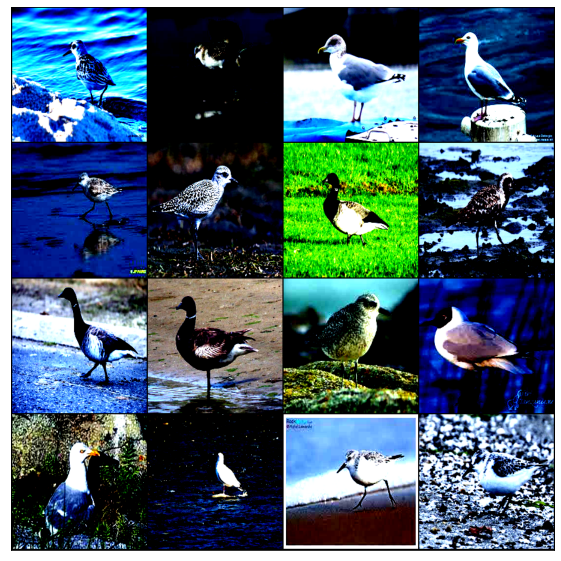

In [61]:
# Visualize one training batch
for images, labels in train_data_loader:
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 4).permute(1,2,0))
    break
    

In [7]:
### Define model
model = models.vgg16(pretrained = True)

### Modifying last few layers and no of classes
# NOTE: cross_entropy loss takes unnormalized op (logits), then function itself applies softmax and calculates loss, so no need to include softmax here
model.classifier = nn.Sequential(
    nn.Linear(25088, 4096, bias = True),
    nn.ReLU(inplace = True),
    nn.Dropout(0.4),
    nn.Linear(4096, 2048, bias = True),
    nn.ReLU(inplace = True),
    nn.Dropout(0.4),
    nn.Linear(2048, 5)
)


In [8]:
device = torch.device('cpu') if torch.cuda.is_available() else torch.device('cuda')
torch.cuda.empty_cache()



In [15]:
optimizer = torch.optim.Adam(model.parameters(), lr=10e-4)
lr_schedueler = torch.optim.lr_scheduler.StepLR(optimizer , step_size = 5, gamma = 0.75)
criterion = nn.CrossEntropyLoss()

train_loss = []
train_accuracy = []

epochs = 5
range(5)

range(0, 5)

In [14]:
def calc_accuracy(prediction , test):
    pred = F.softmax(prediction, dim=1)
    true = torch.zeros(pred.shape[0], pred.shape[1]).scatter_(1, true.unsqueeze(1), 1.)
    acc = (true.argmax(-1) == pred.argmax(-1)).float().detach().numpy()
    acc = float((100 * acc.sum()) / len(acc))
    return round(acc, 6)


TypeError: 'DataLoader' object is not subscriptable

In [11]:
### Training Code

for epoch in range(epochs):
    
    start = time.time()
    
    #Epoch Loss & Accuracy
    train_epoch_loss = []
    train_epoch_accuracy = []
    _iter = 1
    model = model.to(device)
    # Training
    for images, labels in train_data_loader:
        print("jsuis al fréro")
        images = images.to(device)
        labels = labels.to(device)
        
        
        #Reset Grads
        optimizer.zero_grad()
        
        #Forward ->
        preds = model(images)
        
        #Calculate Accuracy
       
        
        #Calculate Loss & Backward, Update Weights (Step)
        loss = criterion(preds, labels)
        loss.backward()
        optimizer.step()
        
        #Append loss & acc
        loss_value = loss.item()
        train_epoch_loss.append(loss_value)
      
        
        if _iter % 10 == 0:
            print("> Iteration {} < ".format(_iter))
            print("Iter Loss = {}".format(round(loss_value, 4)))
            
        
        _iter += 1
    
    
    train_epoch_loss = np.mean(train_epoch_loss)
    
    
    end = time.time()
    
    train_loss.append(train_epoch_loss)
    
    
    #Print Epoch Statistics
    print("** Epoch {} ** - Epoch Time {}".format(epoch, int(end-start)))
    print("Train Loss = {}".format(round(train_epoch_loss, 4)))
    

jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
> Iteration 10 < 
Iter Loss = 1.6975
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
> Iteration 20 < 
Iter Loss = 1.6181
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
> Iteration 30 < 
Iter Loss = 1.6151
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
> Iteration 40 < 
Iter Loss = 1.6053
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
> Iteration 50 < 
Iter Loss = 1.6065
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis al fréro
jsuis

In [27]:
PATH = r"C:/Users/thete/OneDrive/Documents/ProjetS3"
torch.save(model.state_dict(), os.path.join(PATH,'vgg16'))

In [30]:
k=0


for images, labels in test_data_loader:
    
    plt.imshow(images)
    if k == 6:
        break
    

TypeError: Invalid shape (16, 3, 224, 224) for image data

KeyboardInterrupt: 

In [75]:
image, label = train_data_loader[(0,0)]
        
        
    

TypeError: 'DataLoader' object is not subscriptable

In [37]:
def get_all_prediction(model, loader):
    preds = torch.tensor([], dtype=torch.long)
    targets = torch.tensor([], dtype=torch.long)
    for data, label in loader:
        data = data.to(device=device, dtype=torch.float32)
        label = label.to(device=device, dtype=torch.long)
        with torch.no_grad():
            output = F.softmax(model(data), dim=1)
        targets = torch.cat((targets, label.cpu()), dim = 0)
        preds = torch.cat((preds, torch.max(output.cpu(), 1)[1]), dim = 0)
    return targets.numpy(), preds.numpy()

In [1]:

model.eval()


NameError: name 'model' is not defined

In [72]:

inputs, classes = next(iter(train_data_loader))
inputs = inputs.to(device)
classes = classes.to(device)
inputs[

torch.Size([3, 224, 224])

In [42]:
plt.figure(figsize=(25, 4))
for i in range(20):
  plt.subplot(2, 10, i + 1)
  plt.axis('off')
  plt.imshow(test_set_array[index[i],:,:], cmap='gray')
  plt.title("{} ({}) | {}".format(str(np.int(preds_1[index[i]])), str(np.int(targets[index[i]])), color=("green" if preds_2[index[i]]==targets[index[i]] else "red"))
plt.show()

SyntaxError: invalid syntax (<ipython-input-42-b2991ff7de76>, line 7)